In [1]:
from envs.doom_env import DoomEnv

# Initializing environment
env = DoomEnv('vizdoom/scenarios/basic.cfg', True)

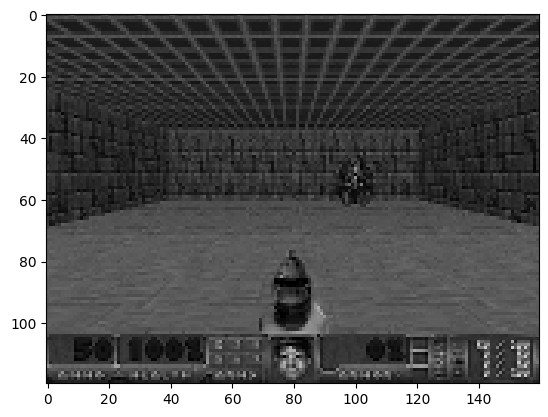

In [2]:
from matplotlib import pyplot as plt
import cv2

frame = env.reset();
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [2]:
observation_shape = env.game.get_state().screen_buffer.shape
print(observation_shape / 2)
# observation_shape = observation_shape[1:] + (1, )
# print(observation_shape)

TypeError: unsupported operand type(s) for /: 'tuple' and 'int'

In [3]:
from agents.custom_ppo_agent import CustomPPOAgent

# Creating ppo agent
agent = CustomPPOAgent(env=env, training_epochs=4)

# Initializing training variables
training_batch_size = 64
number_of_games = 50000

num_learning_iterations = 0
best_score = 0
score_history = []

creating actor network...
successfully created actor network!
creating critic network...
successfully created critic network!
creating optimizer for actor network...
successfully created optimizer for actor network!
creating optimizer for critic network...
successfully created optimizer for critic network!


In [4]:
import numpy as np

for i in range(number_of_games):
    observation = env.reset()
    done = False
    score = 0
    while not done:
        action, probabilities, val = agent.get_optimal_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.remember_experience(observation, action, probabilities, val, reward, done)
        
        if agent.num_of_experiences() >= training_batch_size or done:
            agent.try_learning_from_experience(training_batch_size)
            num_learning_iterations += 1

        observation = observation_

    score_history.append(score)
    avg_score = np.mean(score_history[-100:])

    if avg_score > best_score:
        best_score = avg_score
        agent.save_models()

    agent.memory.clear()

    print('episode', i, 'score %.1f' % score, 'best_score %.1f' % best_score, 'avg_score %.1f' % avg_score,
          'time_steps', training_batch_size, 'learning_steps', num_learning_iterations)

episode 0 score -365.0 best_score 0.0 avg_score -365.0 time_steps 64 learning_steps 2
episode 1 score -360.0 best_score 0.0 avg_score -362.5 time_steps 64 learning_steps 4
episode 2 score 91.0 best_score 0.0 avg_score -211.3 time_steps 64 learning_steps 5
episode 3 score -350.0 best_score 0.0 avg_score -246.0 time_steps 64 learning_steps 7
episode 4 score 66.0 best_score 0.0 avg_score -183.6 time_steps 64 learning_steps 8
episode 5 score -350.0 best_score 0.0 avg_score -211.3 time_steps 64 learning_steps 10
episode 6 score -345.0 best_score 0.0 avg_score -230.4 time_steps 64 learning_steps 12
episode 7 score -355.0 best_score 0.0 avg_score -246.0 time_steps 64 learning_steps 14
episode 8 score -370.0 best_score 0.0 avg_score -259.8 time_steps 64 learning_steps 16
episode 9 score 83.0 best_score 0.0 avg_score -225.5 time_steps 64 learning_steps 17
episode 10 score -355.0 best_score 0.0 avg_score -237.3 time_steps 64 learning_steps 19
episode 11 score -355.0 best_score 0.0 avg_score -247

KeyboardInterrupt: 

In [ ]:
# Saving models
agent.save_models()

In [3]:
env.close()